# Sobre o notebook

Aproveite esse espaço para as atividades do curso de Data Visualization: gráficos de composição e relacionamento da Alura. Aqui você pode escrever e testar os códigos dos diversos desafios envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [7]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#DEE2E6', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

## Aula 01 - Proporção dos dados

### Desafio 1

In [8]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')


In [10]:
# Criando um df com os dados desejados
df_servicos = df_pib.copy()
df_servicos = df_servicos.query('ano == 2018')[['regiao', 'va_servicos']]
df_servicos = df_servicos.groupby('regiao').sum()
df_servicos = df_servicos.sort_values('va_servicos', ascending=False)

df_servicos


,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


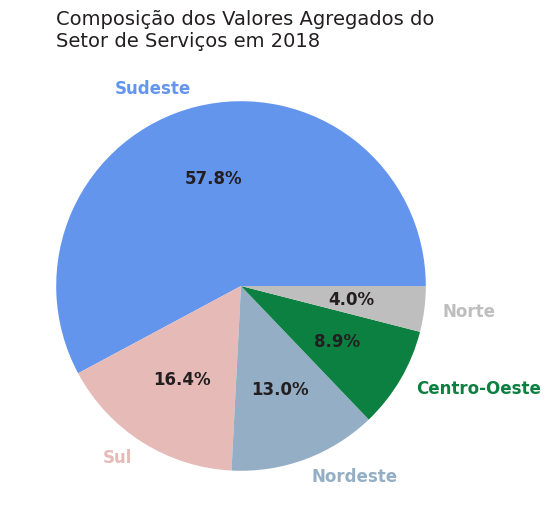

In [11]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14, 6))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE1, CINZA5]

# Personalizando o gráfico
ax.set_title(
    'Composição dos Valores Agregados do\nSetor de Serviços em 2018',
    fontsize=14,
    ha='left',
    color=CINZA1,
    x=0.1,
)

# Gerando o gráfico de pizza
ptc, text, _ = ax.pie(
    data=df_servicos,
    x='va_servicos',
    labels=df_servicos.index,
    autopct='%.1f%%',
    pctdistance=0.6,
    colors=cores,
    textprops={'size': 12, 'fontweight': 'bold', 'color': CINZA1},
)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

plt.show()


### Desafio 2

In [12]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv')


In [14]:
# Criando um df com os dados desejados
df_n_2010 = df_pib.query('ano == 2010')[['regiao', 'va_industria']]
df_n_2020 = df_pib.query('ano == 2020')[['regiao', 'va_industria']]

# Renomeando todas as regiões exceto a Norte como 'Outros'
df_n_2010.loc[df_n_2010['regiao'] != 'Norte', 'regiao'] = 'Outros'
df_n_2020.loc[df_n_2020['regiao'] != 'Norte', 'regiao'] = 'Outros'

# Agrupando os dados
df_n_2010 = df_n_2010.groupby('regiao').sum()
df_n_2020 = df_n_2020.groupby('regiao').sum()

display(df_n_2010, df_n_2020)


,va_industria
regiao,
Norte,58665438171
Outros,845492561850


,va_industria
regiao,
Norte,137740478879
Outros,1346596521109


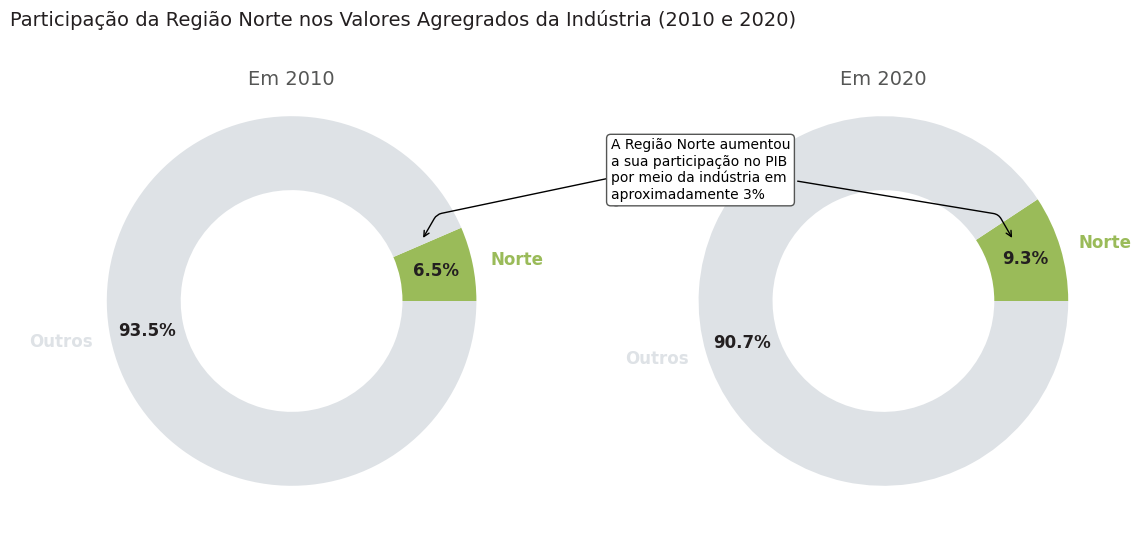

In [15]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Definindo as cores do gráfico
cores = [VERDE2, CINZA6]

# Personalizando o gráfico
plt.suptitle('Participação da Região Norte nos Valores Agregrados da Indústria (2010 e 2020)', 
             fontsize=14, color=CINZA1, ha = 'left', x = 0.1)

# GRÁFICO 1 - Valores Agregados Norte x Outros em 2010
ptc, text, _ = axs[0].pie(data = df_n_2010, x = "va_industria", labels = df_n_2010.index, autopct="%.1f%%",
                          pctdistance=0.8, textprops={"size": 12, "fontweight":"bold", "color": CINZA1},
                          wedgeprops=dict(width=0.4), colors = cores)

# Título do Gráfico 1
axs[0].set_title('Em 2010', fontsize=14, color=CINZA3, y = 0.95)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#######################################

# GRÁFICO 2 - Valores Agregados Norte x Outros em 2020
ptc, text, _ = axs[1].pie(data = df_n_2020, x = "va_industria", labels = df_n_2020.index, autopct="%.1f%%",
                          pctdistance=0.8, textprops={"size": 12, "fontweight":"bold", "color": CINZA1},
                          wedgeprops=dict(width=0.4), colors = cores)

# Título do Gráfico 2
axs[1].set_title('Em 2020', fontsize=14, color=CINZA3, y = 0.95)

# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#######################################

# Anotações do gráfico
axs[0].annotate('\n\n\n', xy=(260, 210), xycoords='axes points', xytext=(400, 240), textcoords='axes points',            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=60,armA=30,armB=30,rad=5"))
                
axs[1].annotate('A Região Norte aumentou\na sua participação no PIB\npor meio da indústria em\naproximadamente 3%', xy=(260, 210), xycoords='axes points', xytext=(-30, 240), textcoords='axes points', bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=-60,armA=30,armB=-30,rad=5"))

plt.show()


## Aula 02 - Compondo dados estáticos

### Desafio 1

### Desafio 2

## Aula 03 - Compondo dados dinâmicos

### Desafio 1

### Desafio 2

## Aula 04 - Investigando a variação dos dados

### Desafio 1

### Desafio 2

## Aula 05 - Relacionando dados

### Desafio 1

### Desafio 2